<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
from scipy.stats import pearsonr

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# 1. Boxplot for "Median value of owner-occupied homes" (MEDV)

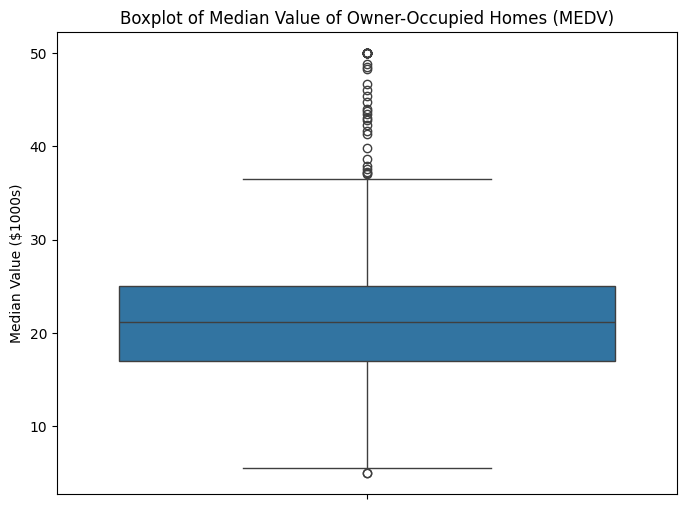

Statistic: The boxplot shows the distribution of median home values. The median value is represented by the line within the box. The box shows the interquartile range (IQR), which contains the middle 50% of the data. Whiskers extend to the most extreme non-outlier data points, and any points beyond the whiskers are considered outliers.


In [5]:
pyplot.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
pyplot.ylabel('Median Value ($1000s)')
pyplot.show()
print("Statistic: The boxplot shows the distribution of median home values. The median value is represented by the line within the box. The box shows the interquartile range (IQR), which contains the middle 50% of the data. Whiskers extend to the most extreme non-outlier data points, and any points beyond the whiskers are considered outliers.")

# 2. Bar plot for the Charles River variable (CHAS)


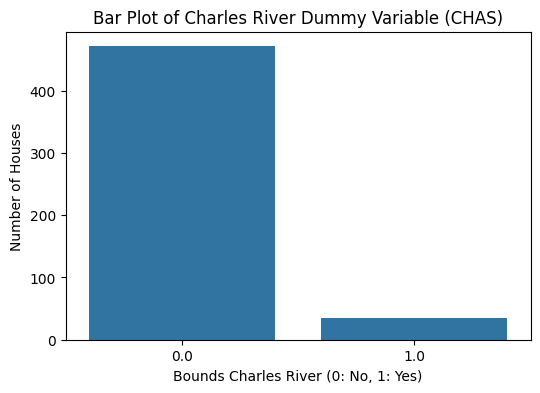

Statistic: This bar plot illustrates the distribution of houses that bound the Charles River versus those that don't. The height of each bar represents the number of houses in each category.


In [6]:
pyplot.figure(figsize=(6, 4))
sns.countplot(x=boston_df['CHAS'])
pyplot.title('Bar Plot of Charles River Dummy Variable (CHAS)')
pyplot.xlabel('Bounds Charles River (0: No, 1: Yes)')
pyplot.ylabel('Number of Houses')
pyplot.show()
print("Statistic: This bar plot illustrates the distribution of houses that bound the Charles River versus those that don't. The height of each bar represents the number of houses in each category.")


# 3. Boxplot for MEDV vs. AGE (discretized)
## Discretize AGE into three groups:

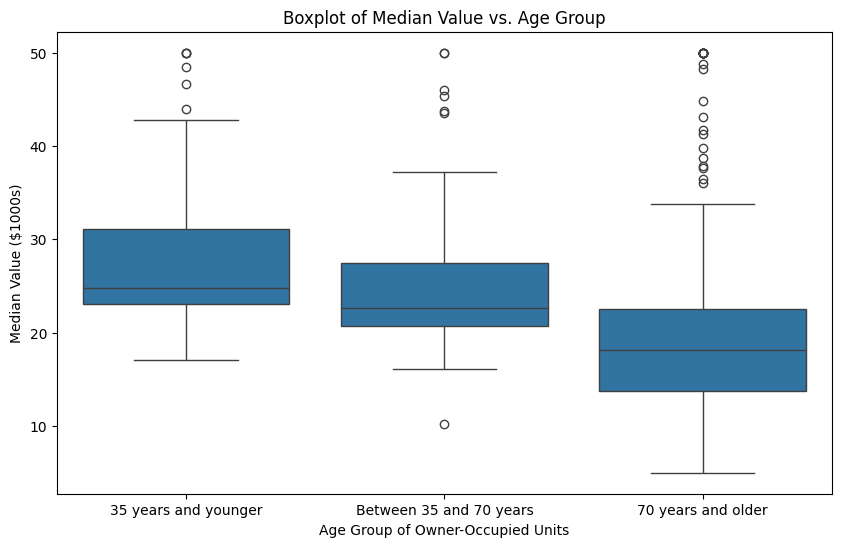

Statistic: The boxplot shows the distribution of median home values for each age group.  This allows for comparison of the central tendency and spread of home values across different age categories.


In [7]:
age_bins = [0, 35, 70, boston_df['AGE'].max()]
age_labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels, right=True)

pyplot.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value vs. Age Group')
pyplot.xlabel('Age Group of Owner-Occupied Units')
pyplot.ylabel('Median Value ($1000s)')
pyplot.show()
print("Statistic: The boxplot shows the distribution of median home values for each age group.  This allows for comparison of the central tendency and spread of home values across different age categories.")

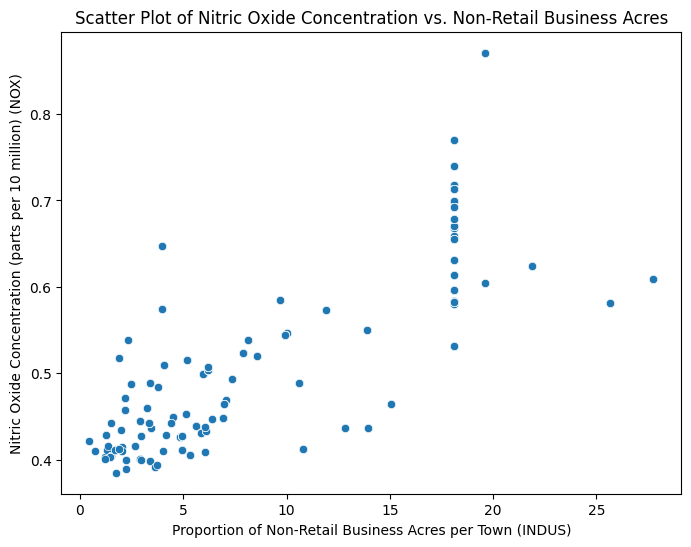

Statistic: This scatter plot visualizes the relationship between nitric oxide concentration and the proportion of non-retail business acres. Based on the plot, there appears to be a positive correlation, meaning that as the proportion of non-retail business acres increases, the nitric oxide concentration also tends to increase.


In [9]:
# 4. Scatter plot for Nitric oxide concentrations (NOX) vs. Proportion of non-retail business acres (INDUS)
pyplot.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Scatter Plot of Nitric Oxide Concentration vs. Non-Retail Business Acres')
pyplot.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxide Concentration (parts per 10 million) (NOX)')
pyplot.show()
print("Statistic: This scatter plot visualizes the relationship between nitric oxide concentration and the proportion of non-retail business acres. Based on the plot, there appears to be a positive correlation, meaning that as the proportion of non-retail business acres increases, the nitric oxide concentration also tends to increase.")

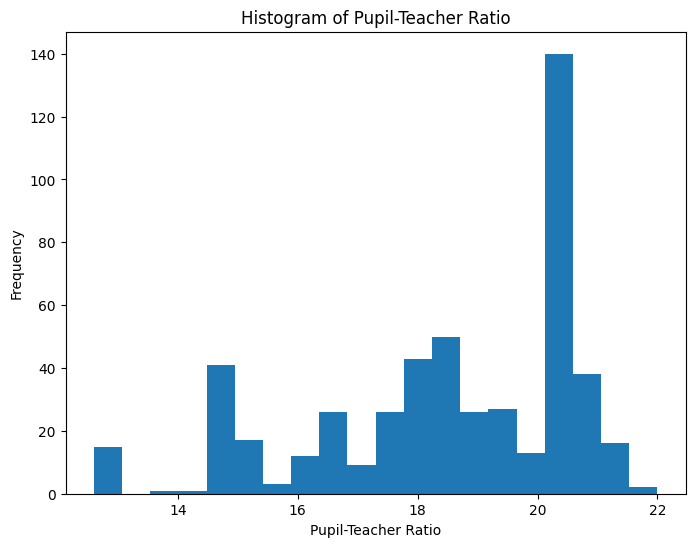

Statistic: The histogram shows the distribution of pupil-teacher ratios across different towns. The x-axis represents the pupil-teacher ratio, and the y-axis represents the frequency of towns with that ratio. This allows for visual assessment of the central tendency, spread, and shape of the distribution.


In [10]:
# 5. Histogram for Pupil-Teacher Ratio (PTRATIO)
pyplot.figure(figsize=(8, 6))
pyplot.hist(boston_df['PTRATIO'], bins=20)
pyplot.title('Histogram of Pupil-Teacher Ratio')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()
print("Statistic: The histogram shows the distribution of pupil-teacher ratios across different towns. The x-axis represents the pupil-teacher ratio, and the y-axis represents the frequency of towns with that ratio. This allows for visual assessment of the central tendency, spread, and shape of the distribution.")


# Task 3: Hypothesis Testing

In [13]:
# 1. T-test for MEDV difference based on Charles River (CHAS)
# Hypothesis:
# Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles River (CHAS=1) and those not bounded by the river (CHAS=0).
# Alternative Hypothesis (H1): There is a significant difference in the median value of houses bounded by the Charles River (CHAS=1) and those not bounded by the river (CHAS=0).

chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
t_statistic, p_value = ttest_ind(chas_0, chas_1)
print("\nT-test for MEDV difference based on Charles River:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in median value between houses bounded by the Charles River and those that are not.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in median value between houses bounded by the Charles River and those that are not.")


T-test for MEDV difference based on Charles River:
T-statistic: -3.996437466090509
P-value: 7.390623170519905e-05
Conclusion: Reject the null hypothesis. There is a significant difference in median value between houses bounded by the Charles River and those that are not.


In [16]:
# 2. ANOVA for MEDV difference based on AGE groups
# Hypothesis:
# Null Hypothesis (H0): There is no significant difference in the median value of houses (MEDV) across the different age groups (AGE_Group).
# Alternative Hypothesis (H1): There is a significant difference in the median value of houses (MEDV) across the different age groups (AGE_Group).

age_groups = boston_df['AGE_Group'].unique()
medv_by_age = [boston_df[boston_df['AGE_Group'] == group]['MEDV'] for group in age_groups]
f_statistic, p_value = f_oneway(*medv_by_age)

print("\nANOVA for MEDV difference based on AGE groups:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in median value across different age groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in median value across different age groups.")


ANOVA for MEDV difference based on AGE groups:
F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Conclusion: Reject the null hypothesis. There is a significant difference in median value across different age groups.


In [20]:
# 3. Pearson Correlation for NOX and INDUS relationship
# Hypothesis:
# Null Hypothesis (H0): There is no relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).
# Alternative Hypothesis (H1): There is a relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

correlation, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("\nPearson Correlation for NOX and INDUS relationship:")
print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is a statistically significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no statistically significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.")





Pearson Correlation for NOX and INDUS relationship:
Correlation coefficient: 0.7636514469209151
P-value: 7.913361061239527e-98
Conclusion: Reject the null hypothesis. There is a statistically significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.


In [21]:
# 4. Regression Analysis for DIS impact on MEDV
# Hypothesis:
# Null Hypothesis (H0): There is no impact of an additional weighted distance to the five Boston employment centres (DIS) on the median value of owner-occupied homes (MEDV).  The coefficient for DIS is zero.
# Alternative Hypothesis (H1): There is an impact of an additional weighted distance to the five Boston employment centres (DIS) on the median value of owner-occupied homes (MEDV). The coefficient for DIS is not zero.

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X)  # Ordinary Least Squares regression
results = model.fit()

print("\nRegression Analysis for DIS impact on MEDV:")
print(results.summary())

# Extract the coefficient and p-value for DIS
dis_coefficient = results.params['DIS']
dis_p_value = results.pvalues['DIS']


if dis_p_value < alpha:
    print(f"Conclusion: Reject the null hypothesis.  DIS has a significant impact on MEDV. For each additional unit of weighted distance to the five Boston employment centers, the median value of owner-occupied homes is expected to change by approximately ${dis_coefficient*1000:.2f}.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no statistically significant impact of weighted distance to employment centers on median home value.")


Regression Analysis for DIS impact on MEDV:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        17:45:42   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  